In [60]:
import torch
import matplotlib.pyplot as plt

In [149]:
def f(x, c, H):
    return (torch.matmul(torch.matmul(x, H), x) + torch.matmul(c, x))/2

In [150]:
x = torch.arange(5, dtype=torch.float32, requires_grad=True)
H = torch.rand(5,5, dtype=torch.float32)*10
H = torch.matmul(H.T,H)
c = torch.ones(5, dtype=torch.float32)
f(x, c, H)

tensor(6898.6484, grad_fn=<DivBackward0>)

In [151]:
epoch = 200
ls = []
while True:
    loss = f(x, c, H)
    ls.append(loss.detach().numpy())
    loss.backward()
    g = x.grad
    if sum(torch.norm(g)) < 0.0001:
        break
    d = -g
    lr = torch.matmul(g,g)/torch.matmul(torch.matmul(g,H), g)
    x.data += lr*d.data
    x.grad.zero_()
    print(loss, x)
    

tensor(6898.6484, grad_fn=<DivBackward0>) tensor([-1.9279, -0.7886, -0.0655,  0.8548,  2.1864], requires_grad=True)
tensor(191.2042, grad_fn=<DivBackward0>) tensor([-1.6661, -0.4384,  0.1366,  1.4456,  0.6337], requires_grad=True)
tensor(35.9602, grad_fn=<DivBackward0>) tensor([-1.6879, -0.5081,  0.1121,  1.3400,  0.5709], requires_grad=True)
tensor(30.1023, grad_fn=<DivBackward0>) tensor([-1.5451, -0.5006,  0.2546,  1.2826,  0.5539], requires_grad=True)
tensor(25.8630, grad_fn=<DivBackward0>) tensor([-1.5587, -0.5428,  0.2324,  1.2031,  0.5027], requires_grad=True)
tensor(22.7245, grad_fn=<DivBackward0>) tensor([-1.4431, -0.5113,  0.3293,  1.1548,  0.4788], requires_grad=True)
tensor(20.2453, grad_fn=<DivBackward0>) tensor([-1.4530, -0.5384,  0.3073,  1.0898,  0.4370], requires_grad=True)
tensor(18.2535, grad_fn=<DivBackward0>) tensor([-1.3555, -0.4942,  0.3755,  1.0466,  0.4164], requires_grad=True)
tensor(16.5762, grad_fn=<DivBackward0>) tensor([-1.3637, -0.5129,  0.3533,  0.9905,  

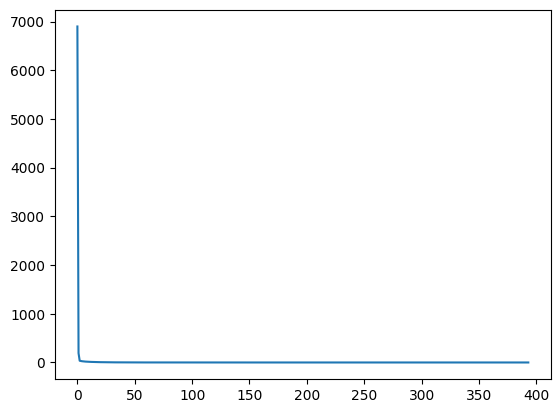

In [152]:
plt.plot(range(len(ls)), ls)
# plt.ylim((-2,2))

In [155]:
import torch
import matplotlib.pyplot as plt

def f(x, c, H):
    return (torch.matmul(torch.matmul(x, H), x) + torch.matmul(c, x))/2

# 随机维度
shape = 100
# 当g<p是停止迭代
p = 1
# 超参数
beta = 0.5
beta = torch.tensor(beta)
sigma = 0.1
# 随机参数
H = torch.rand(shape,shape, dtype=torch.float32)*10
H = torch.matmul(H.T,H)
c = torch.ones(shape, dtype=torch.float32)

# zero x
x = torch.ones(shape, dtype=torch.float32, requires_grad=True)

ls = []
while True:
    loss = f(x, c, H)
    ls.append(loss.detach().numpy())
    loss.backward()
    g = x.grad
    print(loss)
    if torch.norm(g) < p:
        break
    d = -g
    # lr = torch.matmul(g,g)/torch.matmul(torch.matmul(g,H), g)
    beta_m = 0
    for i in range(20):
        # beta的m次方
        beta_m = torch.pow(beta, i)
        if f(x+beta_m, c, H) <= loss-sigma*beta_m*torch.matmul(g,g):
            break
    lr = beta_m
    x.data += lr*d.data
    x.grad.zero_()
    # print(loss, x)
    
plt.plot(range(len(ls)-2), ls[2:])
plt.show()
print(x)


tensor(12707353., grad_fn=<DivBackward0>)
tensor(3356866.2500, grad_fn=<DivBackward0>)
tensor(886820.1875, grad_fn=<DivBackward0>)
tensor(234326.8438, grad_fn=<DivBackward0>)
tensor(61962.3477, grad_fn=<DivBackward0>)
tensor(16429.7578, grad_fn=<DivBackward0>)
tensor(4401.3784, grad_fn=<DivBackward0>)
tensor(1223.5494, grad_fn=<DivBackward0>)
tensor(383.7046, grad_fn=<DivBackward0>)
tensor(161.4699, grad_fn=<DivBackward0>)
tensor(102.3875, grad_fn=<DivBackward0>)
tensor(86.4066, grad_fn=<DivBackward0>)
tensor(81.8145, grad_fn=<DivBackward0>)
tensor(80.2337, grad_fn=<DivBackward0>)
tensor(79.4512, grad_fn=<DivBackward0>)
tensor(78.8824, grad_fn=<DivBackward0>)
tensor(78.3729, grad_fn=<DivBackward0>)
tensor(77.8819, grad_fn=<DivBackward0>)
tensor(77.3984, grad_fn=<DivBackward0>)
tensor(76.9197, grad_fn=<DivBackward0>)
tensor(76.4450, grad_fn=<DivBackward0>)
tensor(75.9740, grad_fn=<DivBackward0>)
tensor(75.5066, grad_fn=<DivBackward0>)
tensor(75.0429, grad_fn=<DivBackward0>)
tensor(74.58

KeyboardInterrupt: 

In [154]:
torch.pow(torch.tensor(2), 10)

tensor(1024)

In [ ]:
import torch
import matplotlib.pyplot as plt

def f(x, c, H):
    return (torch.matmul(torch.matmul(x, H), x) + torch.matmul(c, x))/2

# 随机维度
shape = 100
# 当g<p是停止迭代
p = 1
maxk = 5000
# 随机参数
H = torch.rand(shape,shape, dtype=torch.float32)*10
H = torch.matmul(H.T,H)
c = torch.rand(shape, dtype=torch.float32)

# zero x
x = torch.ones(shape, dtype=torch.float32, requires_grad=True)
beta = torch.tensor(0.5)
sigma = torch.tensor(0.4)

# 存储f(x)值
ls = []
# 存储梯度值
grads = []
pre_g = torch.zeros(shape, dtype=torch.float32)
for i in range(maxk):
    loss = f(x, c, H)
    ls.append(loss.detach().numpy())
    loss.backward()
    g = x.grad
    
    grads.append(g.clone())
    # 验证相邻步梯度是否正交，验证代码逻辑
    # print(torch.matmul(pre_g, g))
    # 前一步的grad，使用clone开辟新的内存空间存储，detach不会开辟新的内存空间
    pre_g = g.clone()
    
    if torch.norm(g) < p:
        break
    d = -g
    
    mk = 0
    for i in range(20):
        if f(x+torch.pow(beta, i)*d) <= loss + sigma*torch.pow(beta, i)*torch.matmul(d,g):
            mk=i
            break
    
    print(mk)
    x.data += torch.pow(beta, mk)*d.data
    x.grad.zero_()
    
print([torch.matmul(grads[i],grads[i+1]) for i in range(len(grads)-1)])
# 输出最优解
print(x)

plt.plot(range(len(ls)-2), [i-loss.detach().numpy() for i in ls[2:]])
plt.xlabel('epoch')
plt.ylabel('|f(x)-f(x*)|')
plt.title('Fastest descent method, precise line search.')
plt.show()

In [2]:
a = [5,4,9]
a

[5, 4, 9]

In [4]:
a.pop(0)

5

In [5]:
a

[4, 9]